# EDA For Diamond Dataset 
![](https://images-na.ssl-images-amazon.com/images/I/615HMgt2EoL._UY625_.jpg)

EDA will be preformed on this dataset by analayzing all variables thoroughly.
for more info on this data: [Click Here!](https://www.kaggle.com/shivam2503/diamonds)

## Basic size and shape and info on dataset before split

In [18]:
import pandas as pd
import pandas as pd
import cufflinks as cf; cf.go_offline()
diamond = pd.read_csv("Data/diamonds.csv")
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [19]:
diamond.drop("Unnamed: 0",axis = 1, inplace = True)
diamond.shape

(53940, 10)

In [20]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Basic data insights:
* Medium sized dataset (50k).
* In terms of data types:
    1. **Categorical (Ordinal)** - cut, color, clarity.
    2. **Numerical (Continuous)** - carat, depth, table, price, x, y, z  
    3. **Price (target)** - Continuous
* No missing values.
* A - 90 - 5 - 5 test val split is initiated for this regression problem.

In [21]:
from sklearn.model_selection import train_test_split
X = diamond.drop("price", axis = 1)
y = diamond["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state = 36)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.05/0.95, random_state = 36) # 25% of 80% is 20%
print(f"Train set: X_train size: {X_train2.shape}, X_train size: {y_train2.shape}")
print(f"Cross val set: X_train size: {X_val.shape}, X_train size: {y_val.shape}")
print(f"test set: X_train size: {X_test.shape}, X_train size: {y_test.shape}")

Train set: X_train size: (48546, 9), X_train size: (48546,)
Cross val set: X_train size: (2697, 9), X_train size: (2697,)
test set: X_train size: (2697, 9), X_train size: (2697,)


In [22]:
#train set
Train = X_train2.copy()
Train["price"] = y_train2
Train.sample(3)# display how the data looks after prep

#cv set
Cross_val = X_val.copy()
Cross_val["price"] = y_val

#test set
Test = X_test.copy()
Test["price"] = y_test

print(f"Train set shape: {Train.shape}, Cross val set shape: {Cross_val.shape}, Test set shape: {Test.shape}")

Train set shape: (48546, 10), Cross val set shape: (2697, 10), Test set shape: (2697, 10)


Now the data is split to 3 sets:

* **Training:** 90%

* **Cross validation:** 5%

* **Testing:** 5%


## Basic Data Exploration

Here we will try to better understand the train data:

In [23]:
Train.describe(include = ["object"])

,cut,color,clarity
count,48546,48546,48546
unique,5,7,8
top,Ideal,G,SI1
freq,19366,10111,11752


In [24]:
Train.describe()

,carat,depth,table,x,y,z,price
count,48546.000000,48546.000000,48546.000000,48546.000000,48546.000000,48546.000000,48546.00000
mean,0.798418,61.750571,57.457251,5.732272,5.735766,3.539499,3932.52167
std,0.474257,1.436809,2.236781,1.121729,1.145202,0.707126,3985.34674
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.00000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.00000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2408.00000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000,5321.00000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.00000


In [25]:
Train.price.describe()

count    48546.00000
mean      3932.52167
std       3985.34674
min        326.00000
25%        950.00000
50%       2408.00000
75%       5321.00000
max      18823.00000
Name: price, dtype: float64

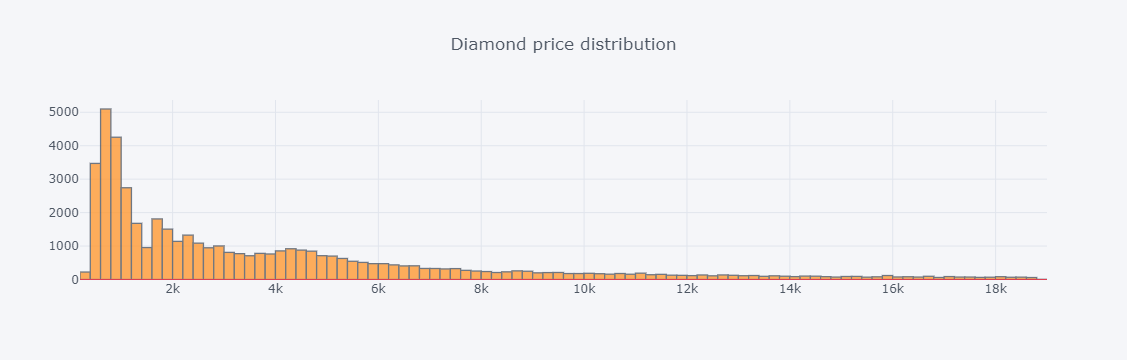

In [26]:
Train.price.iplot(kind='hist', title = 'Diamond price distribution', hline=(0))